In [2]:
#This is my first homework at Data Mining 2024
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../dataset/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./dataset/"))

# Any results you write to the current directory are saved as output.

['battles.csv', 'character-deaths.csv', 'character-predictions.csv']


In [3]:
import pandas as pd

# 讀取資料
data = pd.read_csv("dataset/character-deaths.csv")

# 將索引從 1 開始
data.index = range(1, len(data) + 1)

data

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
2,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
4,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
5,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
914,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
915,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
916,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [4]:
#將空值替換為 0
data.fillna(0, inplace=True)
data

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
2,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
4,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
5,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,Zollo,None,0.0,0.0,0.0,21.0,1,0,0,0,1,0,0
914,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
915,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
916,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [5]:
# 將 'Death Year' 有值的轉換成 1 (死亡), 空值的轉換成 0 (存活)
data['Death'] = data['Death Year'].apply(lambda x: 1 if x != 0 else 0)

# 將 Allegiances 轉換為 dummy 特徵
data = pd.get_dummies(data, columns=['Allegiances'])

In [6]:
# 拆分訓練集和測試集
from sklearn.model_selection import train_test_split

# 特徵和目標
X = data.drop(['Name', 'Death Year', 'Book of Death', 'Death Chapter', 'Death'], axis=1)  # Name等非特徵的列剔除
y = data['Death']

# 拆分資料集為訓練集(75%)和測試集(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# 使用 DecisionTreeClassifier 進行預測
from sklearn.tree import DecisionTreeClassifier

# 創建決策樹模型，限制樹的深度
clf = DecisionTreeClassifier(max_depth=5)

# 訓練模型
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

In [8]:
#  生成 Confusion Matrix，計算 Precision, Recall, Accuracy
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
 [[126  42]
 [ 22  40]]
Precision: 0.4878048780487805
Recall: 0.6451612903225806
Accuracy: 0.7217391304347827


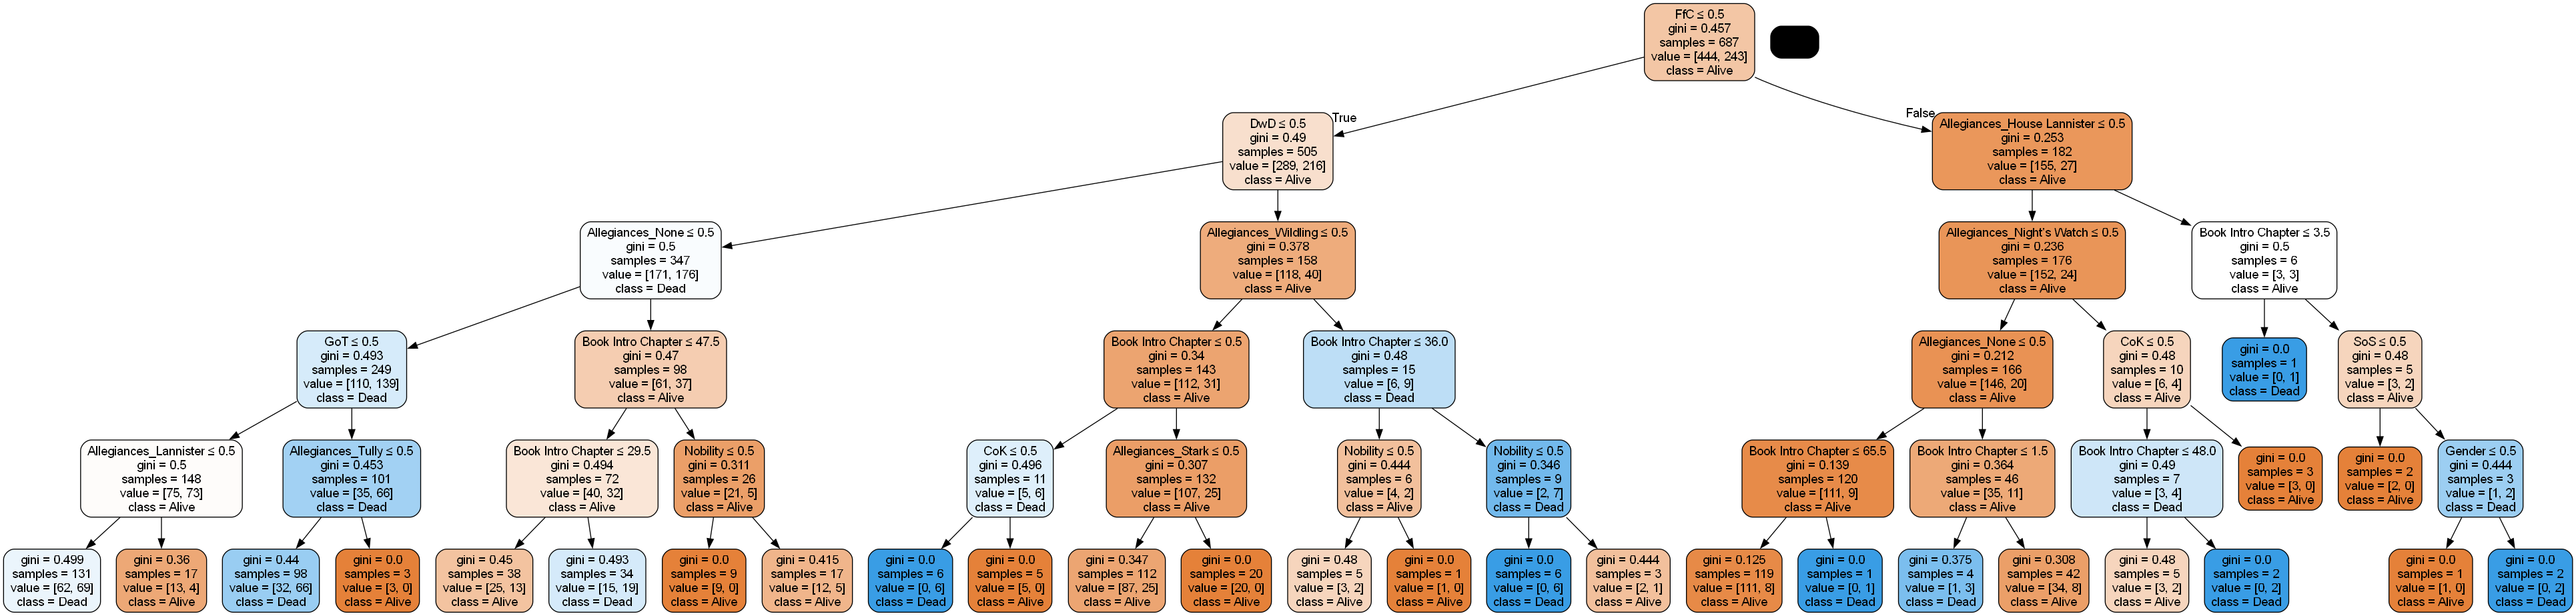

In [9]:
#生成決策樹圖

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
import graphviz

# 將決策樹導出為 .dot 格式
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Alive', 'Dead'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# 使用 pydotplus 將 dot_data 轉換為圖像
graph = pydotplus.graph_from_dot_data(dot_data)  

# 顯示圖像
Image(graph.create_png())

In [10]:
# 將決策樹圖保存為 PNG
graph.write_png("decision_tree.png")

True